In [ ]:
# Connect google drive to google colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
main_datasets_path = '/content/drive/MyDrive/AVD/Trabajos_3_4/Datasets/'

# Clústering de películas para inferir patrones

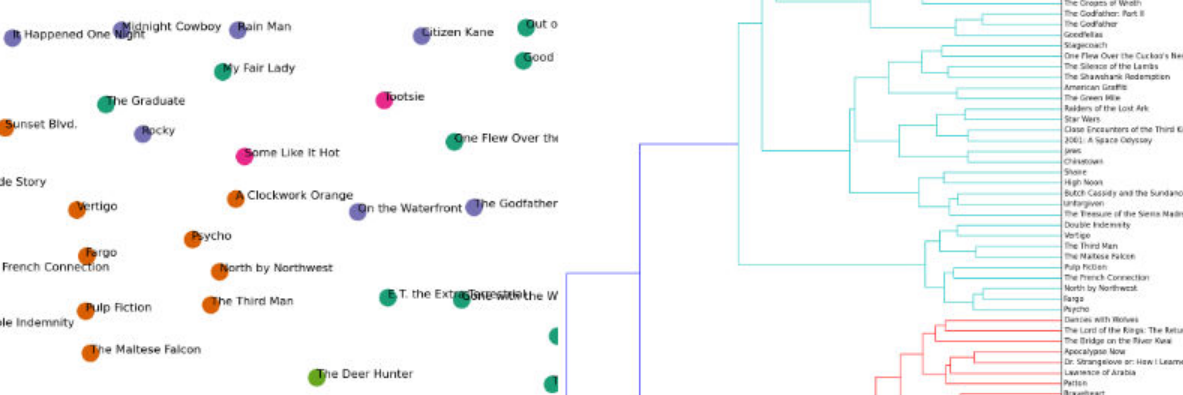

En este caso se va a realizar el clustering de las películas mediante diferentes métodos con el fin de encontrar patrones entre ellas. Por ejemplo podemos ver si películas con altas puntuaciones pertenecen a los mismos clústeres y películas con bajas puntuaciones pertenecen al mismo clúster. Otro caso podría ser observar si existen clústeres que se relacionan con los géneros de las películas. Por ejemplo, un clúster contiene en su mayoría películas de terror y otro películas de comedia que son bastante diferentes entre ellas.


# Cargamos nuestros datos

In [ ]:
import pandas as pd

# Training data (features)
X = pd.read_csv(main_datasets_path+'tmdb_predefined_features.csv')
X.head()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,...,language_da,language_de,language_en,language_es,language_fr,language_hi,language_it,language_ja,language_ko,language_zh
0,4.585146,3.113586,-0.262113,0.054284,-0.432285,20.449494,886204,4834,0.0,3054.0,...,0,0,1,0,0,0,0,0,0,0
1,1.133250,2.703168,-0.079794,0.133318,2.048429,19.550159,471220,48350,0.0,1238.0,...,0,0,1,0,0,0,0,0,0,0
2,3.593033,1.745528,-0.262113,-0.323989,0.203796,19.114199,275868,11700,1.0,994.0,...,0,0,1,0,0,0,0,0,0,0
3,5.323081,2.475159,6.862262,12.124679,1.221525,19.920595,1144337,106759,0.0,2701.0,...,0,0,1,0,0,0,0,0,0,0
4,2.445134,1.015897,-0.108291,-0.122861,-0.455184,18.106774,212204,1873,1.0,738.0,...,0,0,1,0,0,0,0,0,0,0


In [ ]:
# Labels that can be used to compare and get results
fused_df = pd.read_csv(main_datasets_path+'fused_tmdb_imdb_dataset.csv')
genres = fused_df["genres"]
genres.head()

0    ['Action', 'Adventure', 'Fantasy', 'Science Fi...
1                   ['Adventure', 'Fantasy', 'Action']
2                     ['Action', 'Adventure', 'Crime']
3             ['Action', 'Crime', 'Drama', 'Thriller']
4           ['Action', 'Adventure', 'Science Fiction']
Name: genres, dtype: object

In [ ]:

from sklearn.preprocessing import MultiLabelBinarizer

# Crear un DataFrame sin nombre de columna específico
df = pd.DataFrame(genres, columns=['genres'])
# Convertir las cadenas de géneros a listas de Python
df['genres'] = df['genres'].apply(eval)
# Inicializar MultiLabelBinarizer
mlb = MultiLabelBinarizer()
# Ajustar y transformar los géneros a un formato one-hot
one_hot_genres = mlb.fit_transform(df['genres'])
# Crear un DataFrame con los géneros codificados, sin unirlo al original ya que solo tenemos una columna
one_hot_genres = pd.DataFrame(one_hot_genres, columns=mlb.classes_)
one_hot_genres.head()


,,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,Thriller,War,Western
0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [ ]:
# Labels (0, 1, 2, 3)
Y_classification = pd.read_csv(main_datasets_path+'tmdb_classification_labels.csv')
Y_classification.head()

,imdb_binned_score
0,2
1,2
2,2
3,3
4,2


In [ ]:
# Film titles (names)
names = pd.read_csv(main_datasets_path+'fused_tmdb_imdb_titles.csv')
names.head()

,original_title
0,Avatar
1,Pirates of the Caribbean At World's End
2,Spectre
3,The Dark Knight Rises
4,John Carter


In [ ]:
from sklearn.model_selection import train_test_split

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, Y_train_genres, Y_test_genres = train_test_split(X, one_hot_genres, test_size=0.2, random_state=42)
X_train, X_test, Y_train_classification, Y_test_classification = train_test_split(X, Y_classification, test_size=0.2, random_state=42)
X_train, X_test, Y_train_names, Y_test_names = train_test_split(X, names, test_size=0.2, random_state=42)


# Entrenamiento y evaluación de los resultados

Seleccione 2 algoritmos diferentes de aprendizaje automático para clústering (machine learning) y entrénelos empleando los datos proporcionados (X_train). Evalúe los resultados utilizando todas las métricas de evaluación que conozca vistas en la asignatura. Al ser un clústering no tenemos etiquetas por lo que debe emplear métricas que no dependan de estas para el cálculo. Grafique (en la manera de lo posible) y comente con una celda de texto todo lo que observe de este análisis.

Por ejemplo, se proporcionan los nombres de las películas para ver que películas acaban en cada clúster. Puede observar por ejemplo si las películas mñas famosas o conocidas acaban todas en un mismo clauster asociando los nombres a los clústeres. Además de las métricas, grafique los reusltados de sus clústeres con técnicas de reducción de dimensionalidad como PCA y T-SNE. ¿Se observan patrones en los datos tras gráficarlos en 2 dimensiones?

Los algoritmos que hemos elegido para entrenar han sido KMeans y clustering aglomerativo.

En primer lugar vamos a usar el método del codo para determinar el número de clusters que vamos a usar para entrenar nuestros modelos.

In [ ]:
# Desarrolle el código en los bloques siguientes (utilice todos los que necesite)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

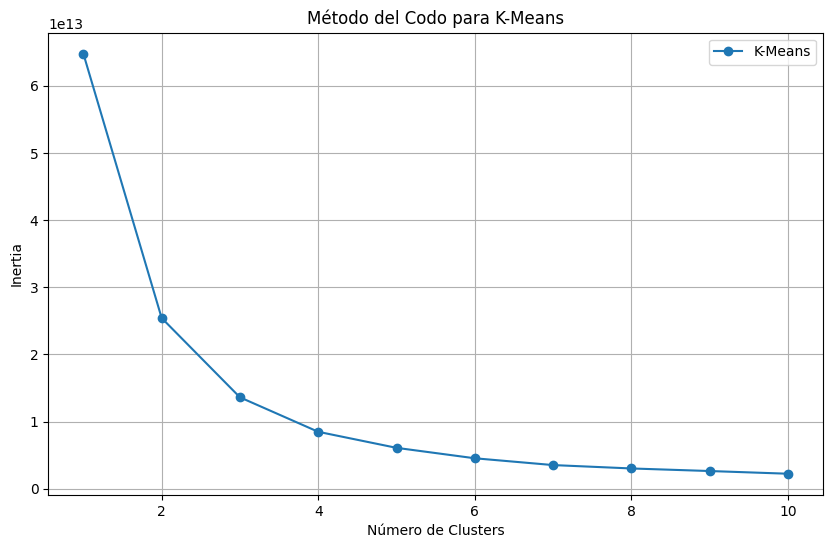

In [ ]:
import matplotlib.pyplot as plt

# Método del codo para K-Means
inertia_kmeans = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_train)
    inertia_kmeans.append(kmeans.inertia_)

# Graficar los resultados
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia_kmeans, label='K-Means', marker='o')
#plt.plot(range(1, 11), inertia_agglomerative, label='Clustering Aglomerativo', marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('Inertia')
plt.title('Método del Codo para K-Means')
plt.legend()
plt.grid(True)
plt.show()


Observando la gráfica establecemos en 4 el número de clusters

A continuación, calculamos 3 métricas para clustering sin etiquetas (Silhouette Score, Calinski-Harabasz Score y Davies-Bouldin Score)

In [ ]:
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X_train)

# calcular las etiquetas de cluster predichas para K-Means
kmeans_labels = kmeans.labels_

# calcular las métricas de evaluación para K-Means
kmeans_silhouette = silhouette_score(X_train, kmeans_labels)
kmeans_calinski_harabasz = calinski_harabasz_score(X_train, kmeans_labels)
kmeans_davies_bouldin = davies_bouldin_score(X_train, kmeans_labels)


agglomerative = AgglomerativeClustering(n_clusters=4)
agglomerative.fit(X_train)

agglomerative_labels = agglomerative.labels_

agglomerative_silhouette = silhouette_score(X_train, agglomerative_labels)
agglomerative_calinski_harabasz = calinski_harabasz_score(X_train, agglomerative_labels)
agglomerative_davies_bouldin = davies_bouldin_score(X_train, agglomerative_labels)


print("Silhouette Score de KMeans:", kmeans_silhouette)
print("Calinski-Harabasz Score de KMeans:", kmeans_calinski_harabasz)
print("Davies-Bouldin Score de KMeans:", kmeans_davies_bouldin)


print("Silhouette Score de clustering aglomerativo:", agglomerative_silhouette)
print("Calinski-Harabasz Score de clustering aglomerativo:", agglomerative_calinski_harabasz)
print("Davies-Bouldin Score de clustering aglomerativo:", agglomerative_davies_bouldin)




/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score de KMeans: 0.6488120865315142
Calinski-Harabasz Score de KMeans: 6393.556405807773
Davies-Bouldin Score de KMeans: 0.5364121843383183
Silhouette Score de clustering aglomerativo: 0.5768039640794054
Calinski-Harabasz Score de clustering aglomerativo: 5840.253510718364
Davies-Bouldin Score de clustering aglomerativo: 0.5876916715739966


In [ ]:
kmeans_labels

array([2, 2, 0, ..., 0, 2, 2], dtype=int32)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

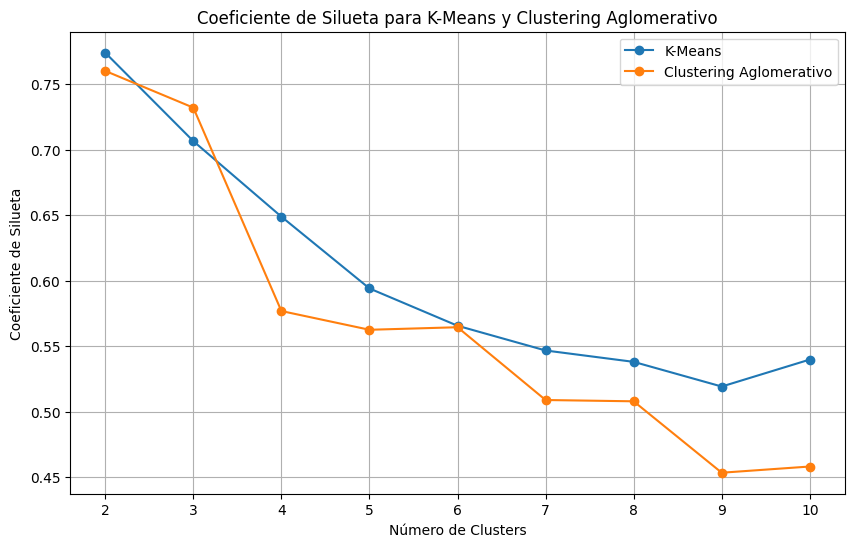

In [ ]:
from sklearn.metrics import silhouette_score

silhouette_scores_kmeans = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_train)
    labels = kmeans.labels_
    silhouette_scores_kmeans.append(silhouette_score(X_train, labels))

silhouette_scores_agglomerative = []
for k in range(2, 11):
    agglomerative = AgglomerativeClustering(n_clusters=k)
    agglomerative.fit(X_train)
    labels = agglomerative.labels_
    silhouette_scores_agglomerative.append(silhouette_score(X_train, labels))

plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores_kmeans, label='K-Means', marker='o')
plt.plot(range(2, 11), silhouette_scores_agglomerative, label='Clustering Aglomerativo', marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('Coeficiente de Silueta')
plt.title('Coeficiente de Silueta para K-Means y Clustering Aglomerativo')
plt.legend()
plt.grid(True)
plt.show()


Lo siguiente que vamos a hacer es aplicar PCA y T-SNE, que son técnicas para reducir la dimensionalidad. En este caso, reduciremos la dimensionalidad a 2, que viene determinado por n_components.

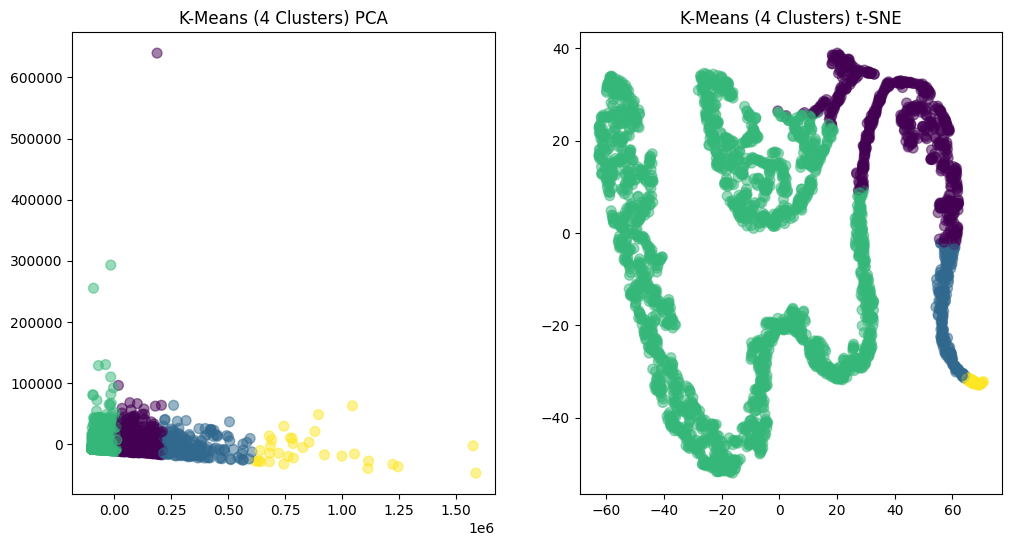

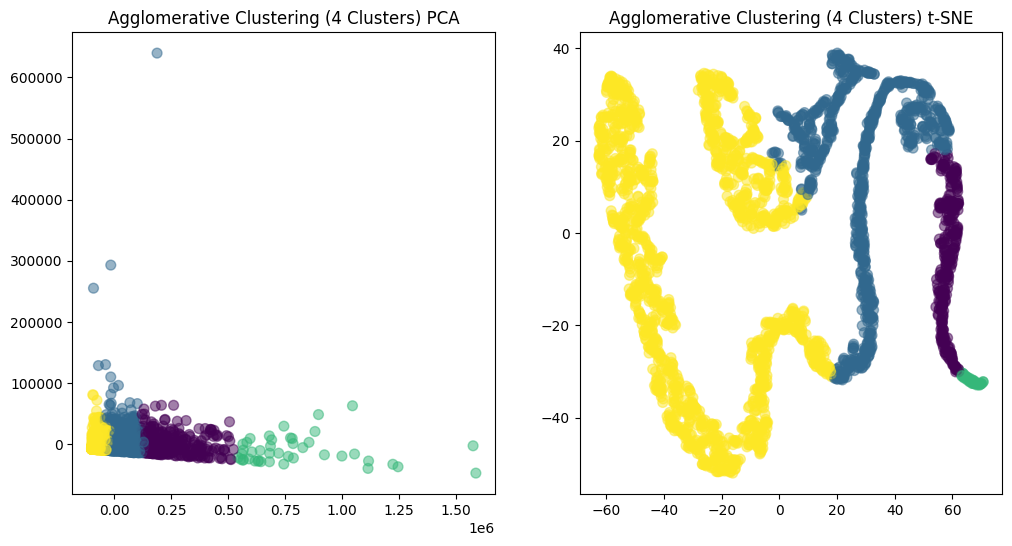

In [ ]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# reducción de dimensionalidad con PCA para K-Means
pca = PCA(n_components=2)

# reducción de dimensionalidad con t-SNE para K-Means
tsne = TSNE(n_components=2, random_state=42)


# reducción de dimensionalidad con PCA para K-Means
X_train_pca_kmeans = pca.fit_transform(X_train)

# reducción de dimensionalidad con t-SNE para K-Means
X_train_tsne_kmeans = tsne.fit_transform(X_train)

# reducción de dimensionalidad con PCA para clustering aglomerativo
X_train_pca_agglomerative = pca.fit_transform(X_train)

# reducción de dimensionalidad con t-SNE para clustering aglomerativo
X_train_tsne_agglomerative = tsne.fit_transform(X_train)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(X_train_pca_kmeans[:, 0], X_train_pca_kmeans[:, 1], c=kmeans_labels, cmap='viridis', s=50, alpha=0.5)
plt.title('K-Means (4 Clusters) PCA')

plt.subplot(1, 2, 2)
plt.scatter(X_train_tsne_kmeans[:, 0], X_train_tsne_kmeans[:, 1], c=kmeans_labels, cmap='viridis', s=50, alpha=0.5)
plt.title('K-Means (4 Clusters) t-SNE')

plt.show()

# Graficar los resultados de clustering aglomerativo con 4 clusters
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(X_train_pca_agglomerative[:, 0], X_train_pca_agglomerative[:, 1], c=agglomerative_labels, cmap='viridis', s=50, alpha=0.5)
plt.title('Agglomerative Clustering (4 Clusters) PCA')

plt.subplot(1, 2, 2)
plt.scatter(X_train_tsne_agglomerative[:, 0], X_train_tsne_agglomerative[:, 1], c=agglomerative_labels, cmap='viridis', s=50, alpha=0.5)
plt.title('Agglomerative Clustering (4 Clusters) t-SNE')

plt.show()

Al usar PCA, podemos observar como los clusters tienen una distancia inter cluster baja ya que están muy juntos. Sin embargoo, la distancia intra cluster es buena ya que los puntos de un mismo cluster están bastante juntos.

En el caso de T-SNE observamos como hay un cluster bastante más grande que el resto. También, se aprecia como en el caso de PCA la baja distancia inter cluster.

Dado que sí tenemos etiquetas, realice una nueva evaluación ahora utilizando métricas que empleen etiquetas y por ejemplo el conjunto de etiquetas de entrenamiento Y_train_classification. Para ello utilice tantas métricas como conozca para clústering que puedan emplearse para este tipo de evaluación.

Compruebe si por ejemplo con este conjunto de etiquetas los clústeres se corresponden con (por ejemplo) los cuatro grupos de clasificación creados en estas etiquetas. Grafique y presente todos los comentarios oportunos tras cada desarrollo proprocionado. Detalle sus explicaciones.

Al igual que en el apartdo anterior calculamos las métricas para clustering sin etiquetas, ahora vamos a usar clustering con etiquetas. Esto supone que las métricas que vayamos a calcular sean otras.

In [ ]:
# Desarrolle el código en los bloques siguientes (utilice todos los que necesite)

In [ ]:
Y_train_classification = Y_train_classification.values.ravel() # como .flatten()


In [ ]:
4 in Y_train_classification

False

In [ ]:
Y_train_classification # toma valores 0,1,2,3

array([2, 1, 2, ..., 1, 1, 2])

In [ ]:
from sklearn import metrics
from sklearn.metrics import (
    completeness_score,
    normalized_mutual_info_score,
    mutual_info_score,
    fowlkes_mallows_score,
    adjusted_rand_score
)
import numpy as np
# Calcula la pureza
def purity_score(y_true, y_pred):
    # Conteo de clases reales y predichas en cada cluster
    contingency_matrix = metrics.cluster.contingency_matrix(y_true, y_pred)
    # Asocia cada cluster con la clase mayoritaria
    cluster_majority_class = contingency_matrix.argmax(axis=1)
    # Retorna la pureza
    return np.sum(np.max(contingency_matrix, axis=1)) / np.sum(contingency_matrix)



# Calcular pureza para K-Means
kmeans_purity = purity_score(Y_train_classification, kmeans_labels)

# Calcular pureza para clustering aglomerativo
agglomerative_purity = purity_score(Y_train_classification, agglomerative_labels)

# Calcular el NMI (Normalized Mutual Information)
kmeans_nmi = normalized_mutual_info_score(Y_train_classification, kmeans_labels)
agglomerative_nmi = normalized_mutual_info_score(Y_train_classification, agglomerative_labels)

# Calcular la información mutua
kmeans_mi = mutual_info_score(Y_train_classification, kmeans_labels)
agglomerative_mi = mutual_info_score(Y_train_classification, agglomerative_labels)

# Calcular la puntuación de Fowlkes-Mallows
kmeans_fm = fowlkes_mallows_score(Y_train_classification, kmeans_labels)
agglomerative_fm = fowlkes_mallows_score(Y_train_classification, agglomerative_labels)

# Calcular el índice Rand ajustado
kmeans_rand = adjusted_rand_score(Y_train_classification, kmeans_labels)
agglomerative_rand = adjusted_rand_score(Y_train_classification, agglomerative_labels)

# Imprimir los resultados
print("K-Means:")
print("Purity Score:", kmeans_purity)
print("NMI Score:", kmeans_nmi)
print("Mutual Information Score:", kmeans_mi)
print("Fowlkes-Mallows Score:", kmeans_fm)
print("Adjusted Rand Score:", kmeans_rand)


print("\nAgglomerative Clustering:")
print("Purity Score:", agglomerative_purity)
print("NMI Score:", agglomerative_nmi)
print("Mutual Information Score:", agglomerative_mi)
print("Fowlkes-Mallows Score:", agglomerative_fm)
print("Adjusted Rand Score:", agglomerative_rand)




K-Means:
Purity Score: 0.7525915687629579
NMI Score: 0.16346515973826053
Mutual Information Score: 0.13210350799166945
Fowlkes-Mallows Score: 0.5479907893441508
Adjusted Rand Score: 0.00927462460282202

Agglomerative Clustering:
Purity Score: 0.6098825155494125
NMI Score: 0.14903924978671895
Mutual Information Score: 0.13545133850127222
Fowlkes-Mallows Score: 0.4867912125444722
Adjusted Rand Score: 0.01986382729965997


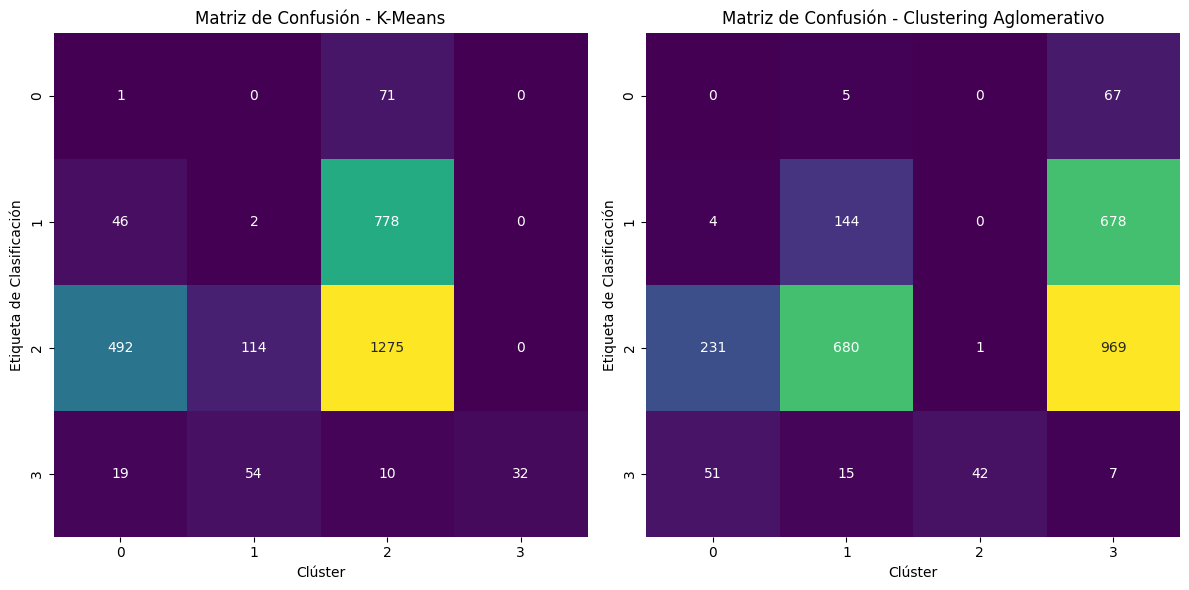

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

conf_matrix_kmeans = confusion_matrix(Y_train_classification, kmeans_labels)
conf_matrix_agglomerative = confusion_matrix(Y_train_classification, agglomerative_labels)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.heatmap(conf_matrix_kmeans, annot=True, fmt='d', cmap='viridis', cbar=False)
plt.title('Matriz de Confusión - K-Means')
plt.xlabel('Clúster')
plt.ylabel('Etiqueta de Clasificación')

plt.subplot(1, 2, 2)
sns.heatmap(conf_matrix_agglomerative, annot=True, fmt='d', cmap='viridis', cbar=False)
plt.title('Matriz de Confusión - Clustering Aglomerativo')
plt.xlabel('Clúster')
plt.ylabel('Etiqueta de Clasificación')

plt.tight_layout()
plt.show()


Analizando la matriz de confusión, llegamos a la conclusión de que los clusters no parecen corresponderse con los 4 grupos de clasificación definidos al comienzo del notebook. Esto lo deducimos ya que lo ideal sería obtener la mayoría de 0s en lo que no es la diagonal principal, y ni la matriz de KMeans ni la de clustering aglomerativo lo cumplen.

Utilice ahora sus algoritmos de clústering entrenados con los datos de test para predecir a que clúster pertenecen. Vuelva a realizar el análisis anterior para comprobar si los resultados son coherentes con los obtenidos previamente y así comprobar que el algoritmo estña realizando lo que se pretenden con los nuevos datos. Grafique y presente todos los comentarios oportunos tras cada desarrollo proprocionado. Detalle sus explicaciones.

In [ ]:
# Desarrolle el código en los bloques siguientes (utilice todos los que necesite)

In [ ]:
Y_train_classification

array([2, 1, 2, ..., 1, 1, 2])

In [ ]:
Y_test_classification

,imdb_binned_score
3449,2
3386,2
1456,2
1078,1
3010,1
...,...
528,2
176,2
2948,2
422,1


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


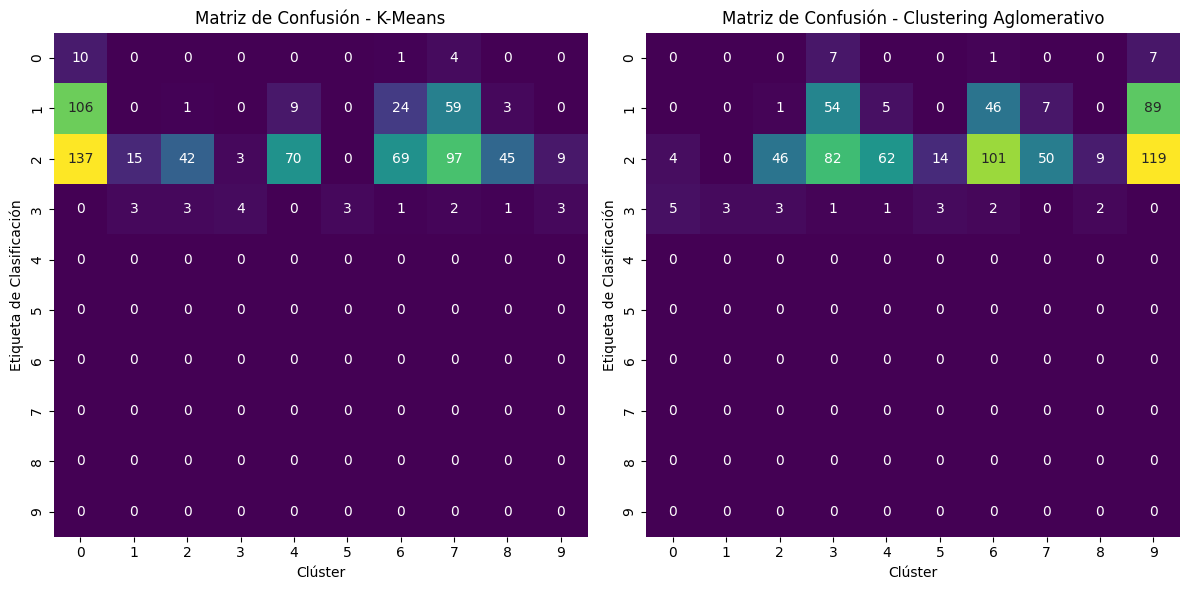

In [ ]:
kmeans.fit(X_test)
kmeans_labels_test = kmeans.predict(X_test)
agglomerative.fit(X_test)
agglomerative_labels_test = agglomerative.labels_
#agglomerative_labels_test = agglomerative.predict(X_test)

conf_matrix_kmeans_test = confusion_matrix(Y_test_classification, kmeans_labels_test)
conf_matrix_agglomerative_test = confusion_matrix(Y_test_classification, agglomerative_labels_test)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.heatmap(conf_matrix_kmeans_test, annot=True, fmt='d', cmap='viridis', cbar=False)
plt.title('Matriz de Confusión - K-Means')
plt.xlabel('Clúster')
plt.ylabel('Etiqueta de Clasificación')

plt.subplot(1, 2, 2)
sns.heatmap(conf_matrix_agglomerative_test, annot=True, fmt='d', cmap='viridis', cbar=False)
plt.title('Matriz de Confusión - Clustering Aglomerativo')
plt.xlabel('Clúster')
plt.ylabel('Etiqueta de Clasificación')

plt.tight_layout()
plt.show()


In [ ]:
kmeans_labels_test

array([7, 0, 9, 4, 0, 7, 8, 0, 7, 0, 2, 4, 7, 4, 0, 7, 2, 0, 8, 7, 9, 0,
       2, 0, 6, 8, 0, 1, 0, 8, 0, 9, 0, 4, 7, 2, 0, 0, 9, 6, 8, 7, 6, 0,
       4, 7, 0, 7, 6, 6, 9, 2, 3, 4, 8, 4, 7, 0, 0, 4, 7, 4, 4, 4, 0, 1,
       4, 7, 1, 8, 0, 1, 7, 7, 0, 2, 6, 0, 8, 6, 0, 0, 6, 6, 0, 2, 0, 8,
       7, 7, 2, 4, 0, 2, 8, 4, 7, 5, 4, 0, 2, 0, 8, 4, 0, 0, 4, 7, 4, 0,
       6, 3, 6, 7, 0, 6, 0, 0, 6, 0, 7, 3, 0, 1, 7, 7, 7, 0, 0, 4, 8, 0,
       4, 6, 0, 0, 0, 0, 2, 7, 2, 2, 7, 2, 0, 8, 0, 0, 8, 6, 2, 0, 0, 7,
       0, 4, 7, 7, 0, 4, 7, 7, 7, 0, 7, 0, 2, 7, 4, 0, 6, 4, 0, 7, 0, 0,
       5, 0, 4, 0, 6, 0, 0, 0, 7, 2, 0, 6, 4, 7, 4, 0, 0, 7, 6, 6, 0, 4,
       7, 4, 0, 0, 8, 7, 6, 8, 4, 0, 0, 7, 0, 6, 0, 0, 7, 2, 2, 0, 6, 4,
       6, 6, 6, 7, 0, 7, 7, 2, 7, 7, 6, 6, 4, 6, 8, 1, 0, 4, 7, 0, 8, 6,
       4, 6, 5, 7, 7, 0, 7, 6, 0, 9, 7, 8, 0, 7, 7, 0, 7, 0, 6, 0, 2, 1,
       4, 0, 6, 6, 7, 0, 6, 0, 0, 3, 6, 6, 6, 7, 4, 0, 0, 0, 0, 6, 0, 6,
       0, 8, 8, 2, 7, 7, 6, 0, 6, 0, 6, 0, 4, 3, 4,

In [ ]:
agglomerative_labels_test

array([3, 9, 5, 7, 9, 3, 4, 9, 6, 9, 2, 7, 6, 7, 9, 3, 2, 9, 4, 6, 5, 3,
       2, 9, 6, 4, 9, 8, 9, 4, 9, 5, 9, 7, 3, 2, 9, 9, 5, 6, 4, 3, 6, 9,
       7, 3, 9, 3, 6, 6, 5, 2, 0, 7, 2, 6, 3, 9, 9, 4, 3, 4, 4, 7, 9, 8,
       7, 3, 8, 4, 9, 5, 3, 3, 3, 2, 6, 9, 4, 6, 9, 3, 6, 6, 9, 2, 9, 4,
       3, 3, 2, 7, 9, 2, 4, 7, 6, 1, 7, 9, 2, 9, 4, 7, 9, 3, 7, 6, 7, 3,
       6, 0, 6, 6, 9, 6, 9, 9, 6, 9, 3, 0, 9, 8, 3, 3, 6, 9, 9, 4, 4, 3,
       7, 6, 9, 9, 9, 9, 2, 3, 2, 2, 6, 2, 9, 4, 9, 9, 4, 6, 2, 9, 9, 6,
       9, 7, 6, 3, 9, 4, 6, 6, 3, 3, 3, 9, 2, 3, 7, 9, 6, 7, 3, 3, 9, 9,
       1, 9, 7, 9, 6, 9, 3, 9, 3, 2, 9, 6, 4, 3, 4, 9, 9, 6, 6, 6, 9, 7,
       3, 7, 9, 9, 4, 3, 6, 4, 4, 9, 9, 3, 3, 6, 9, 9, 3, 2, 2, 3, 6, 7,
       6, 6, 6, 3, 3, 3, 3, 2, 3, 6, 6, 6, 4, 6, 4, 8, 3, 7, 3, 9, 4, 6,
       7, 6, 1, 3, 3, 9, 3, 6, 9, 5, 3, 4, 9, 6, 3, 3, 3, 9, 6, 3, 2, 8,
       7, 9, 6, 6, 6, 3, 6, 9, 3, 0, 6, 6, 6, 6, 4, 9, 9, 9, 9, 6, 9, 6,
       9, 4, 4, 2, 3, 6, 6, 9, 6, 9, 6, 9, 4, 0, 7,

Con estos gráifcos queremos visualizar el número de películas clasificadas con una valoración u otra, el cual se obtiene sumando las distintas filas. También se puede observar que al entrenar con el conjunto de test aumenta el número de labels.


Además tenemos las etiquetas de los géneros. Estas etiquetas son algo más complicada pero podemos comprobar con un nuevo número de clústeres si estos tienen alguna relación con los géneros de las películas. en este caso tenemos 19 géneros diferentes pero el reto es que estas etiquetas son multiclase, es decir, puede haber varios géneros asociados a cada películas. Se pide en este apartado que entrene los dos algoritmos previos pero ahora con 19 clases. Asocie ahora estos clústeres a los géneros de las películas para ver si existe alguna correspondencia. Utilice tñecnicas de reducción de dimensionalidad para observar los reusltados. Genere tantas visualizaciones como crea necesario para explicar sus resultados.

*** Nota: Es probable que no obtenga buenos reusltados pues depende mucho de la extracción de características realizada pues está más centrada en la predicción de los scores que en la detección del género de la película. Esto se analizará con otros campos de texto en el próximo notebook.

In [ ]:
# Desarrolle el código en los bloques siguientes (utilice todos los que necesite)

In [ ]:
one_hot_genres

,,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,Thriller,War,Western
0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3613,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3614,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3615,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0
3616,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [ ]:
X_train

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,...,language_da,language_de,language_en,language_es,language_fr,language_hi,language_it,language_ja,language_ko,language_zh
1965,-0.063845,-0.306559,-0.200908,0.105520,-0.368677,17.350368,54242,4662,8.0,145.0,...,0,0,1,0,0,0,0,0,0,0
1670,-0.891972,-0.443365,-0.259522,-0.091248,-0.432285,16.960648,11092,3742,4.0,44.0,...,0,0,1,0,0,0,0,0,0,0
1320,0.510105,-0.443365,-0.085623,0.005773,0.394620,17.492629,198701,17902,0.0,1138.0,...,0,0,1,0,0,0,0,0,0,0
1018,0.920069,-0.032947,-0.250131,-0.056909,0.203796,17.747711,155745,14073,0.0,1053.0,...,0,0,1,0,0,0,0,0,0,0
3153,0.977464,1.061499,-0.191193,-0.029656,0.458228,13.497897,580999,17040,1.0,2110.0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1130,0.469108,-1.264199,-0.210299,-0.004038,9.935828,18.012207,75345,303717,0.0,290.0,...,0,0,1,0,0,0,0,0,0,0
1294,-0.359019,0.833489,5.243086,-0.200805,0.903484,18.186223,127503,24006,0.0,261.0,...,0,0,1,0,0,0,0,0,0,0
860,1.108652,0.924693,-0.220338,6.128998,0.839876,19.507975,220758,64040,2.0,919.0,...,0,0,1,0,0,0,0,0,0,0
3507,-0.408214,-0.488967,-0.260818,-0.302186,-0.432285,9.818964,9376,1558,0.0,74.0,...,0,0,1,0,0,0,0,0,0,0


In [ ]:
# Obtener los índices de las filas de X_train
indices_X_train = X_train.index

# Filtrar one_hot_genres para que contenga solo las filas correspondientes a X_train
one_hot_genres_filtered = one_hot_genres.loc[indices_X_train]
one_hot_genres_filtered

,,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,Thriller,War,Western
1965,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1670,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1320,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
1018,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
3153,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1130,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
1294,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
860,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0
3507,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0


Volvemos a entrenar los 2 modelos de machine learning para clustering. En este caso, lo haremos con 19 clusters (1 por cada género).

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Asociación de Clústeres a Géneros de Películas - K-Means (19 clases):
{0: 'Drama', 1: 'Drama', 2: 'Drama', 3: 'Drama', 4: 'Drama', 5: 'Action', 6: 'Action', 7: 'Comedy', 8: 'Drama', 9: 'Drama', 10: 'Action', 11: 'Drama', 12: 'Action', 13: 'Drama', 14: 'Crime', 15: 'Comedy', 16: 'Drama', 17: 'Drama', 18: 'Drama'}

Asociación de Clústeres a Géneros de Películas - Clustering Aglomerativo (19 clases):
{0: 'Drama', 1: 'Drama', 2: 'Action', 3: 'Drama', 4: 'Drama', 5: 'Drama', 6: 'Action', 7: 'Drama', 8: 'Drama', 9: 'Drama', 10: 'Crime', 11: 'Action', 12: 'Action', 13: 'Action', 14: 'Comedy', 15: 'Drama', 16: 'Adventure', 17: 'Drama', 18: 'Drama'}


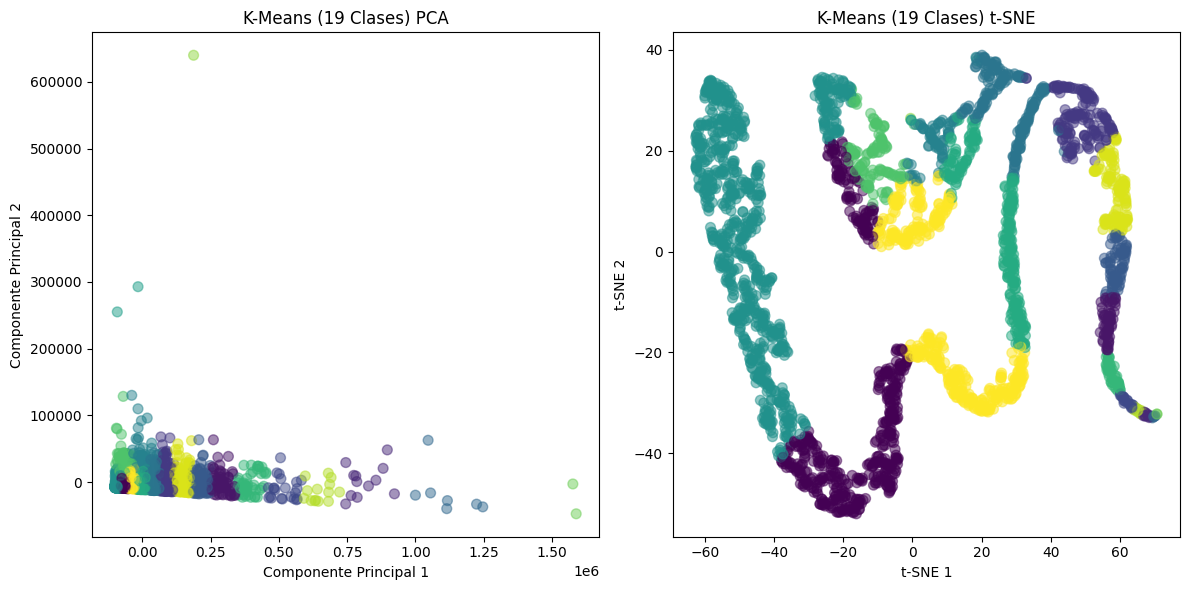

Text(0, 0.5, 't-SNE 2')

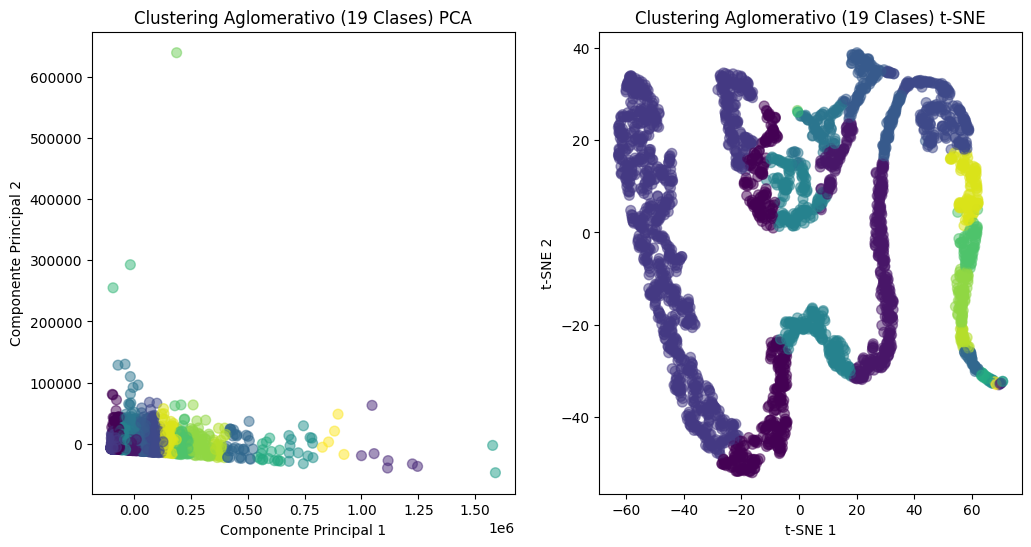

In [ ]:

from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Entrenar K-Means con 19 clases
kmeans_19 = KMeans(n_clusters=19, random_state=42)
kmeans_19.fit(X_train)

# Entrenar Clustering Aglomerativo con 19 clases
agglomerative_19 = AgglomerativeClustering(n_clusters=19)
agglomerative_19.fit(X_train)

# reducción de dimensionalidad con PCA para K-Means (19 clases)
pca_kmeans_19 = PCA(n_components=2)
X_train_pca_kmeans_19 = pca_kmeans_19.fit_transform(X_train)

# reducción de dimensionalidad con t-SNE para K-Means (19 clases)
tsne_kmeans_19 = TSNE(n_components=2, random_state=42)
X_train_tsne_kmeans_19 = tsne_kmeans_19.fit_transform(X_train)

# reducción de dimensionalidad con PCA para Clustering Aglomerativo (19 clases)
pca_agglomerative_19 = PCA(n_components=2)
X_train_pca_agglomerative_19 = pca_agglomerative_19.fit_transform(X_train)

# reducción de dimensionalidad con t-SNE para Clustering Aglomerativo (19 clases)
tsne_agglomerative_19 = TSNE(n_components=2, random_state=42)
X_train_tsne_agglomerative_19 = tsne_agglomerative_19.fit_transform(X_train)

# Asociar clústeres a géneros de películas
kmeans_genre_mapping_19 = {}
agglomerative_genre_mapping_19 = {}

for cluster in range(19):
    cluster_movies_kmeans_19 = X_train_pca_kmeans_19[kmeans_19.labels_ == cluster]
    cluster_movies_agglomerative_19 = X_train_pca_agglomerative_19[agglomerative_19.labels_ == cluster]

    cluster_genres_kmeans_19 = one_hot_genres_filtered[kmeans_19.labels_ == cluster]
    cluster_genres_agglomerative_19 = one_hot_genres_filtered[agglomerative_19.labels_ == cluster]

    genre_counts_kmeans_19 = cluster_genres_kmeans_19.sum(axis=0)
    genre_counts_agglomerative_19 = cluster_genres_agglomerative_19.sum(axis=0)

    dominant_genre_kmeans_19 = genre_counts_kmeans_19.idxmax()
    dominant_genre_agglomerative_19 = genre_counts_agglomerative_19.idxmax()

    kmeans_genre_mapping_19[cluster] = dominant_genre_kmeans_19
    agglomerative_genre_mapping_19[cluster] = dominant_genre_agglomerative_19

# Imprimir la asociación de clústeres a géneros de películas
print("Asociación de Clústeres a Géneros de Películas - K-Means (19 clases):")
print(kmeans_genre_mapping_19) # saca de que hay mas canciones en cada cluster
print("\nAsociación de Clústeres a Géneros de Películas - Clustering Aglomerativo (19 clases):")
print(agglomerative_genre_mapping_19)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(X_train_pca_kmeans_19[:, 0], X_train_pca_kmeans_19[:, 1], c=kmeans_19.labels_, cmap='viridis', s=50, alpha=0.5)
plt.title('K-Means (19 Clases) PCA')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')

plt.subplot(1, 2, 2)
plt.scatter(X_train_tsne_kmeans_19[:, 0], X_train_tsne_kmeans_19[:, 1], c=kmeans_19.labels_, cmap='viridis', s=50, alpha=0.5)
plt.title('K-Means (19 Clases) t-SNE')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')

plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(X_train_pca_agglomerative_19[:, 0], X_train_pca_agglomerative_19[:, 1], c=agglomerative_19.labels_, cmap='viridis', s=50, alpha=0.5)
plt.title('Clustering Aglomerativo (19 Clases) PCA')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')

plt.subplot(1, 2, 2)
plt.scatter(X_train_tsne_agglomerative_19[:, 0], X_train_tsne_agglomerative_19[:, 1], c=agglomerative_19.labels_, cmap='viridis', s=50, alpha=0.5)
plt.title('Clustering Aglomerativo (19 Clases) t-SNE')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')




En cuanto a la reducción de dimensionalidad con PCA y T-SNE podemos observar como la gran mayoría de las observaciones hechas para la reducción de dimensionalidad con 4 clusters se siguen cumpliendo en esta ocasión.

Los resultados obtenidos nos muestran como muchos de los clusters obtenidos son asociados al género drama al ser el género que más aparece en las películas de dicho cluster. A continuación, vamos a estudiar a qué se puede deber esto.

In [ ]:
one_hot_genres=one_hot_genres.drop('',axis=1)

In [ ]:
s = []
for column_name in one_hot_genres.columns:
    column_sum = one_hot_genres[column_name].sum()
    s.append((column_name, column_sum))
s_sorted = sorted(s, key=lambda x: x[1], reverse=True)
s_sorted



[('Drama', 1719),
 ('Comedy', 1397),
 ('Thriller', 1001),
 ('Action', 927),
 ('Romance', 707),
 ('Adventure', 661),
 ('Crime', 567),
 ('Science Fiction', 418),
 ('Family', 410),
 ('Horror', 358),
 ('Fantasy', 352),
 ('Mystery', 277),
 ('Animation', 179),
 ('Music', 137),
 ('History', 124),
 ('War', 92),
 ('Documentary', 53),
 ('Western', 49),
 ('Foreign', 10)]

Observamos como el género drama es el que está en más películas.

In [ ]:
#kmeans_genre_mapping_19
dicc = {}
for i, genre in enumerate(one_hot_genres.columns):
    dicc[i] = genre
dicc

{0: 'Action',
 1: 'Adventure',
 2: 'Animation',
 3: 'Comedy',
 4: 'Crime',
 5: 'Documentary',
 6: 'Drama',
 7: 'Family',
 8: 'Fantasy',
 9: 'Foreign',
 10: 'History',
 11: 'Horror',
 12: 'Music',
 13: 'Mystery',
 14: 'Romance',
 15: 'Science Fiction',
 16: 'Thriller',
 17: 'War',
 18: 'Western'}